In [9]:
import cv2
import numpy as np

## Task 1: Compute image descriptors

In [10]:
def transform_color(image, color_space):

    conv_color = {
        "Gray": cv2.COLOR_RGB2GRAY,
        "CieLAB": cv2.COLOR_RGB2LAB,        
        "YCbCr": cv2.COLOR_RGB2YCrCb,
        "HSV": cv2.COLOR_RGB2HSV,
    }

    if color_space not in conv_color:
        print("Color sapce is not in the list!")

    return cv2.cvtColor(image, conv_color[color_space])

## Task 2: Similarity measures

**h_dataset** : Matrix containing the n dataset histogram data <br>
**h_query** : Matrix containing the test image histogram data


### Previous: Check the sizes of histograms and matches them

In [8]:
def check(h_dataset, h_query):

    im_dataset, vals_dataset = np.shape(h_dataset)
    size_shape = np.shape(np.shape(h_query))[0]
    
    
    # Case 1:
    if size_shape == 1:
        h_query = h_query[None, ...]
        nims, nvals_query = np.shape(h_query)

    # Case 2:
    if size_shape > 1:
        print("query histogram is more bigger")
    else:
        nims, nvals_query = np.shape(h_query)

    # Case 3:
    if nvals_query != vals_dataset:
        print("Histogram bins dimensions don't match")
    else:
        h_query = np.tile(h_query, (im_dataset, 1))

    return h_query

### 1. Eucledian distance

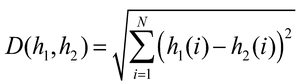

To calculate the n euclidean distance from a test image histrogram data to n histograms in the dataset.

In [1]:
def euclidean(h_dataset, h_query):

    h_query = check(h_dataset, h_query)
    distance = np.sum(np.sqrt((h_dataset - h_query) ** 2), axis=1)

    return distance

### 2. L1 Distance

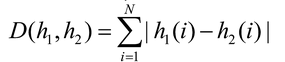

To calculate the n L1 distances from a test image histogram data to n histogram in the dataset.

In [2]:
def l1_distance(h_dataset, h_query):

    h_query = check(h_dataset, h_query)
    distance = np.sum(np.absolute(h_dataset - h_query), axis=1)

    return distance

### 3. X² Distance

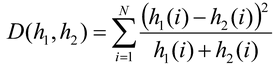

To calculate the n X² distance from a test image histogram data n histograms int he dataset.

In [3]:
def x2_distance(h_dataset, h_query):

    h_query = check(h_dataset, h_query)
    distance = np.sum(np.power((h_dataset - h_query), 2)/ (h_dataset + h_query),axis=1,)

    return distance

### 4. Histogram intersection

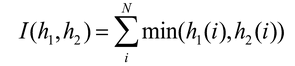

To calculate the n histogram intersection distances from a test image histogram data n histograms in the dataset.

In [4]:
def hist_intersection(h_dataset, h_query):

    h_query = check(h_dataset, h_query)
    distance = 1/(np.sum(np.minimum(h_dataset, h_query), axis=1))
    return distance

### 5. Hellinger kernel 

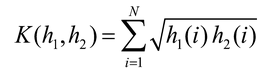

To calculate the n Hellinger kernel distances from a test imae histogram data to n histograms in the dataset.

In [5]:
def hellinger(h_dataset, h_query):

    h_query = check(h_dataset, h_query)
    distance = 1/(np.sum(np.sqrt(h_dataset * h_query), axis=1))
    return distance


### 6. Kullback–Leibler divergence

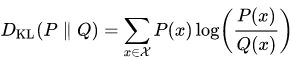

where: Q is h1(x) and P is h2(x)

To calculate the n KL divergende distances from a test image histogram data to n histograms in tha dataset.

In [6]:
def kl_divergence(h_dataset, h_query):

    h_query = check(h_dataset, h_query)
    distance = np.sum(h_query * np.log((h_query) / (h_dataset)), axis=1,)
    return distance

### All function in one function:

In [7]:
def calculate_distances(h_dataset, h_query, mode="euclidean"):
    if mode == "euclidean":
        return euclidean(h_dataset, h_query)
    elif mode == "l1_distance":
        return l1_distance (h_dataset, h_query)
    elif mode == "x2_distance":
        return x2_distance(h_dataset, h_query)
    elif mode == "hist_intersection":
        return hist_intersection(h_dataset, h_query)
    elif mode == "hellinger":
        return hellinger(h_dataset, h_query)
    elif mode == "kl_divergence":
        return kl_divergence(h_dataset, h_query)
    else:
        raise Exception("Not function")